One day I've received such a photo from a friend of mine:

![UMa](https://raw.githubusercontent.com/ussserrr/aov-big-dipper/master/uma.jpg)

You've got it right – this is the *Big Dipper* asterism, a well-known part of the *Ursa Major* (UMa) constellation (the photo is a little bit edited to be able to see the contour more easily, you can find an original one in the GitHub' repository). Also, with the image, a message has been supplied that says "photo is taken by the new glossy Samsung Galaxy S9". And this was a point where I suspected an amiss. Is it some kind of zooming or cropping had been used on this picture or just the UMa is so big that takes almost a third of a horizontal dimension?! But I've checked this, the result was negative. And then I said – I can verify my assumptions and doubts by myself anyway! [To collider!](https://www.smbc-comics.com/comic/2014-11-25) And as a *collider*, we will use, of course, Python, [Astropy](http://www.astropy.org) and some optical knowledge to reveal the truth.

Consider the following geometry (rough):

![Geometry](https://raw.githubusercontent.com/ussserrr/aov-big-dipper/master/geometry.jpg)

First of all, we need to obtain necessary parameters of the S9' camera. It seems like resolution, ratio, pixel size and lens' focal length will be enough, so we googling and grab them from [this article](https://wccftech.com/samsung-galaxy-s9-galaxy-s9-launched-specifications-features-design-price-availability/):

In [1]:
sams_width = 4032
sams_height = 3024
sams_pixel_size = 1.4e-6
sams_focal_length = 26e-3

Before proceeding, keep in mind that the value of a focal length – 26 mm – is scaled to the [full-frame format](https://en.wikipedia.org/wiki/135_film) so to get the actual number we need to calculate a [crop factor](https://en.wikipedia.org/wiki/Crop_factor) of our camera. It simply shows how small our sensor relative to the 35 mm FF format (where diagonal is approximately 43.3 mm):

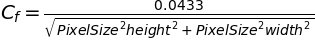

In [2]:
import sympy
sympy.init_printing()

C_f, width, height, pixel_size = sympy.symbols("C_f width height PixelSize")
crop_factor_eq = sympy.Eq(C_f, 43.3e-3 / sympy.sqrt((width*pixel_size)**2 + (height*pixel_size)**2))
display(crop_factor_eq)
width = sams_width
height = sams_height
pixel_size = sams_pixel_size
crop_factor_eq = sympy.Eq(C_f, 43.3e-3 / sympy.sqrt((width*pixel_size)**2 + (height*pixel_size)**2))
display(crop_factor_eq.evalf())
sams_crop_factor = 43.3e-3 / sympy.sqrt((width*pixel_size)**2 + (height*pixel_size)**2)

According to [Wikipedia](https://en.wikipedia.org/wiki/Angle_of_view), the angle of view can be found as (with the crop factor taken into account):

In [3]:
alpha, d, f = sympy.symbols("alpha d f")
aov_eq = sympy.Eq(alpha, 2*sympy.atan(d/(2*(f/C_f))))
display(aov_eq)
d = sams_width*sams_pixel_size
f = sams_focal_length
C_f = sams_crop_factor
aov_eq = sympy.Eq(alpha, 2*sympy.deg(sympy.atan(d/(2*(f/C_f)))))
display(aov_eq.evalf())
sams_aov = 2*sympy.deg(sympy.atan(d/(2*(f/C_f)))).evalf()

The angle of view can be calculated along different vectors in a frame but there, for simplicity, we take the horizontal projection. As a result, we get the AOV to compare it later with an angular size of the Big Dipper asterism.

For this next part, we will use Astropy package as a useful instrument for a wide variety of applied astronomical tasks. Query coordinates of two edgy stars – Alkaid and Dubhe – and calculate angular separation between them:

In [4]:
from astropy.coordinates import SkyCoord

uma_star1 = 'Alkaid'
uma_star2 = 'Dubhe'
uma_star1_coords = SkyCoord.from_name(uma_star1)
uma_star2_coords = SkyCoord.from_name(uma_star2)

sep = uma_star1_coords.separation(uma_star2_coords)
print("UMa angular size, deg:", sep.degree)

UMa angular size, deg: 25.708905207807256


That's simple. We now clearly see that the asterism truly can take a third of the camera' angle of view.

Let's check yourself – using an amazing interactive sky atlas [Aladin](http://aladin.unistra.fr/AladinLite/?target=12%2024%2043.640%2B57%2031%2010.14&fov=27.29&survey=P%2FDSS2%2Fcolor) we can reconstruct the given photo but with this nice scale ruler placed in a field:

![Aladin](https://raw.githubusercontent.com/ussserrr/aov-big-dipper/master/aladin.png)

That's a confirmation to our computations!